In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy as sp
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from scipy.signal import detrend

In [35]:
birth_df = pd.read_csv('Daily_Birth.csv')
birth_df.head()

,Date,Num_Births
0,1977-01-01,208
1,1977-01-02,241
2,1977-01-03,274
3,1977-01-04,256
4,1977-01-05,294


In [36]:
birth_df = birth_df.dropna()

In [37]:
birth_df['Date'] = pd.to_datetime(birth_df['Date'], format='%Y-%m-%d')
birth_df['Month'] = birth_df['Date'].dt.month
birth_df['Year'] = birth_df['Date'].dt.year
birth_df.head()

,Date,Num_Births,Month,Year
0,1977-01-01,208,1,1977
1,1977-01-02,241,1,1977
2,1977-01-03,274,1,1977
3,1977-01-04,256,1,1977
4,1977-01-05,294,1,1977


In [38]:
birth_per_month = birth_df.groupby(['Year', 'Month'])['Num_Births'].sum().reset_index()
birth_per_month.head()

,Year,Month,Num_Births
0,1977,1,8000
1,1977,2,7446
2,1977,3,8682
3,1977,4,8477
4,1977,5,8683


In [39]:
birth_per_month['Date'] = pd.to_datetime(birth_per_month['Year'].astype(str) + '-' + birth_per_month['Month'].astype(str), 
                                        format='%Y-%m')
birth_per_month.head()

,Year,Month,Num_Births,Date
0,1977,1,8000,1977-01-01
1,1977,2,7446,1977-02-01
2,1977,3,8682,1977-03-01
3,1977,4,8477,1977-04-01
4,1977,5,8683,1977-05-01


In [40]:
birth_ts = pd.Series(birth_per_month['Num_Births'].values, index=birth_per_month['Date'])
birth_ts.index.freq = 'MS'
birth_ts

Date
1977-01-01    8000
1977-02-01    7446
1977-03-01    8682
1977-04-01    8477
1977-05-01    8683
              ... 
1990-08-01    8531
1990-09-01    8480
1990-10-01    8156
1990-11-01    7455
1990-12-01    7673
Freq: MS, Length: 168, dtype: int64

Text(0.5, 1.0, 'Birth Time Series')

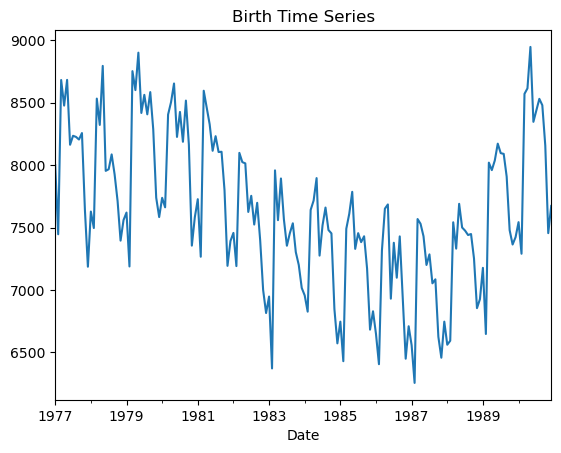

In [41]:
birth_ts.plot()
plt.title('Birth Time Series')

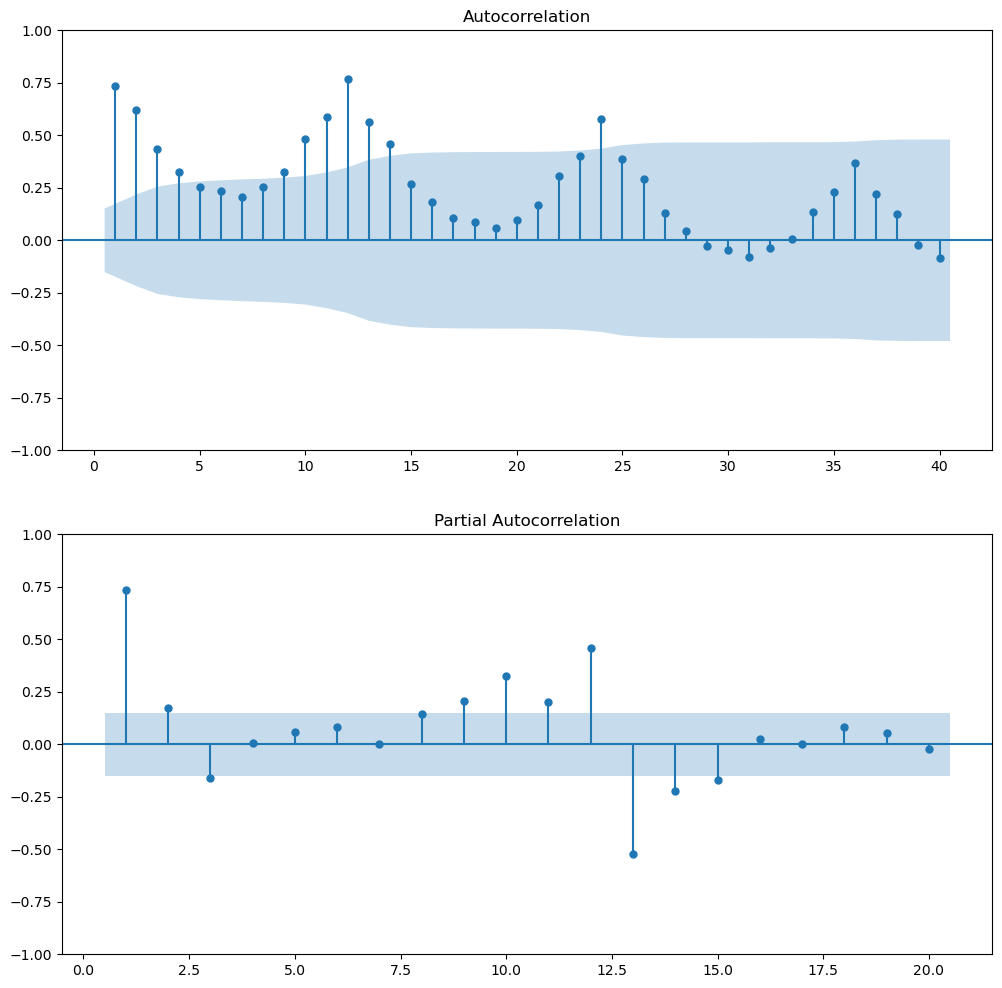

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(birth_ts, ax=ax1, zero=False, lags=40)
plot_pacf(birth_ts, ax=ax2, zero=False, lags=20)
plt.show()

In [43]:
sm.stats.acorr_ljungbox(birth_ts, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,310.84176,7.918528e-61


In [44]:
adfuller(birth_ts, regression='c')

(-1.4809688441573332,
 0.5429038973343864,
 14,
 153,
 {'1%': -3.473829775724492,
  '5%': -2.880622899711496,
  '10%': -2.5769448985432954},
 2099.987876598859)

In [45]:
birth_df2 = birth_df.drop(index=0)
birth_df2['birth_diff'] = np.diff(birth_df['Num_Births'], n=1)
birth_df2 = birth_df2.drop(columns=['Num_Births'])
birth_df2.head()

,Date,Month,Year,birth_diff
1,1977-01-02,1,1977,33
2,1977-01-03,1,1977,33
3,1977-01-04,1,1977,-18
4,1977-01-05,1,1977,38
5,1977-01-06,1,1977,-13


In [46]:
birth_per_month = birth_df2.groupby(['Year', 'Month'])['birth_diff'].sum().reset_index()
birth_per_month.head()

,Year,Month,birth_diff
0,1977,1,55
1,1977,2,27
2,1977,3,18
3,1977,4,-60
4,1977,5,5


In [47]:
birth_per_month['Date'] = pd.to_datetime(birth_per_month['Year'].astype(str) + '-' + birth_per_month['Month'].astype(str), 
                                        format='%Y-%m')
birth_per_month.head()

,Year,Month,birth_diff,Date
0,1977,1,55,1977-01-01
1,1977,2,27,1977-02-01
2,1977,3,18,1977-03-01
3,1977,4,-60,1977-04-01
4,1977,5,5,1977-05-01


In [48]:
birth_ts2 = pd.Series(birth_per_month['birth_diff'].values, index=birth_per_month['Date'])
birth_ts2.index.freq = 'MS'
birth_ts2

Date
1977-01-01    55
1977-02-01    27
1977-03-01    18
1977-04-01   -60
1977-05-01     5
              ..
1990-08-01    -4
1990-09-01   -45
1990-10-01    17
1990-11-01   -14
1990-12-01   -42
Freq: MS, Length: 168, dtype: int64

Text(0.5, 1.0, 'Birth Time Series First Difference')

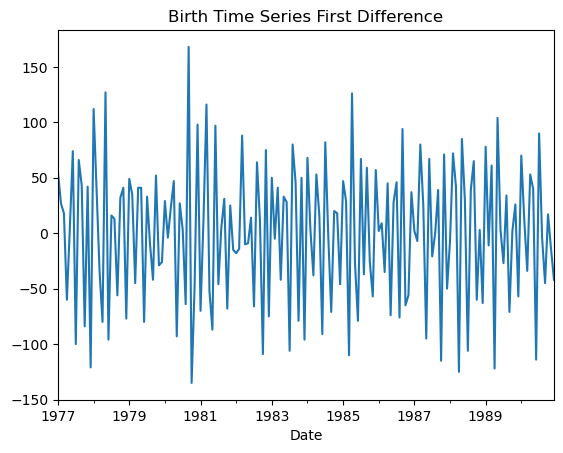

In [49]:
birth_ts2.plot()
plt.title('Birth Time Series First Difference')

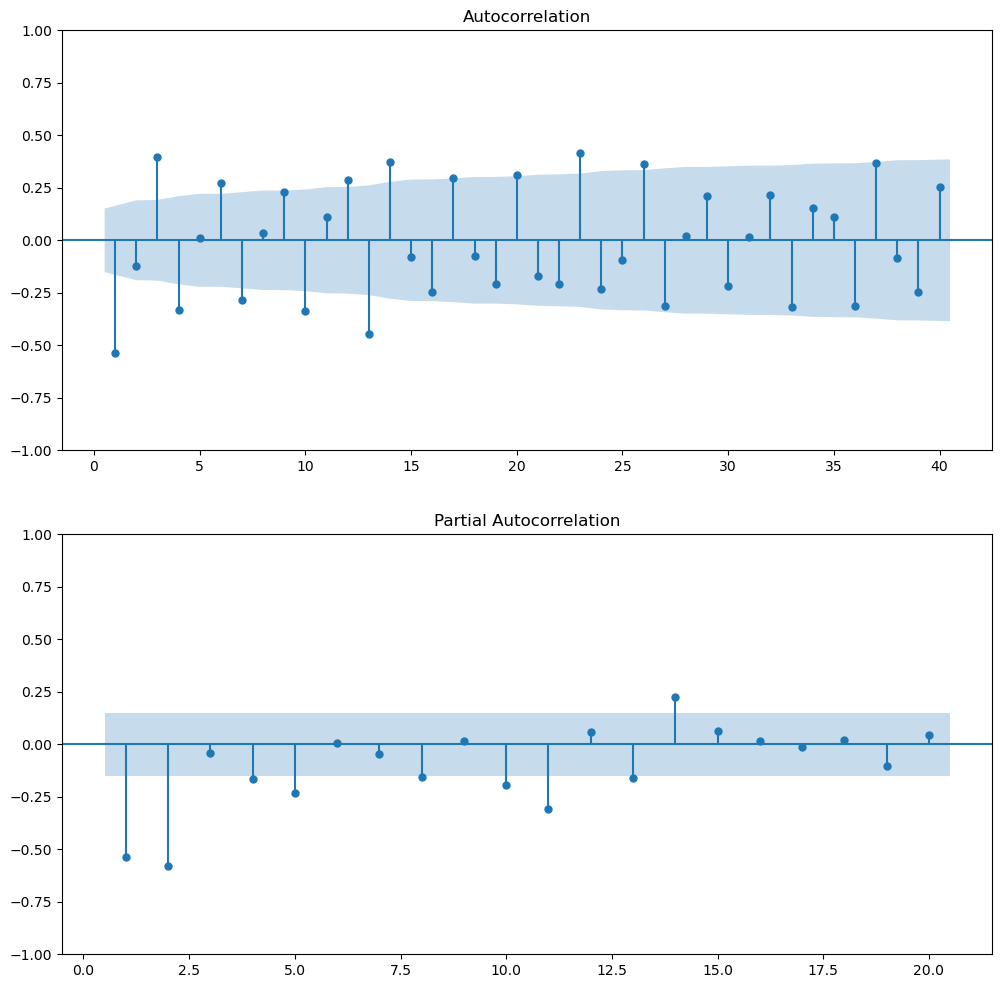

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(birth_ts2, ax=ax1, zero=False, lags=40)
plot_pacf(birth_ts2, ax=ax2, zero=False, lags=20)
plt.show()

In [51]:
sm.stats.acorr_ljungbox(birth_ts2, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,156.522032,1.690914e-28


In [52]:
adfuller(birth_ts2, regression='c')

(-5.9982610324097,
 1.68122866383181e-07,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1518.5544872788319)

In [53]:
fit_ar = ARIMA(birth_ts2, order=(3,1,4)).fit()

print(fit_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  168
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -835.006
Date:                Tue, 08 Oct 2024   AIC                           1686.012
Time:                        13:43:29   BIC                           1710.956
Sample:                    01-01-1977   HQIC                          1696.136
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2606      0.092    -13.655      0.000      -1.442      -1.080
ar.L2         -1.1195      0.106    -10.548      0.000      -1.328      -0.912
ar.L3         -0.1065      0.093     -1.141      0.2

c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
coffee_df = pd.read_csv('coffee_prices-1.csv')
coffee_df.head()

,Month,Year,CPI
0,January,1990,62.75
1,February,1990,67.01
2,March,1990,75.25
3,April,1990,75.34
4,May,1990,73.30


In [55]:
coffee_df['Month'] = pd.to_datetime(coffee_df['Month'], format='%B')
coffee_df.head()

,Month,Year,CPI
0,1900-01-01,1990,62.75
1,1900-02-01,1990,67.01
2,1900-03-01,1990,75.25
3,1900-04-01,1990,75.34
4,1900-05-01,1990,73.30


In [56]:
coffee_per_month = coffee_df.groupby(['Year', 'Month'])['CPI'].sum().reset_index()
coffee_per_month.head()

,Year,Month,CPI
0,1990,1900-01-01,62.75
1,1990,1900-02-01,67.01
2,1990,1900-03-01,75.25
3,1990,1900-04-01,75.34
4,1990,1900-05-01,73.30


In [57]:
coffee_per_month['Date'] = pd.to_datetime(coffee_per_month['Year'].astype(str) + '-' + coffee_per_month['Month'].dt.month.astype(str),
                                        format='%Y-%m')
coffee_per_month.head()

,Year,Month,CPI,Date
0,1990,1900-01-01,62.75,1990-01-01
1,1990,1900-02-01,67.01,1990-02-01
2,1990,1900-03-01,75.25,1990-03-01
3,1990,1900-04-01,75.34,1990-04-01
4,1990,1900-05-01,73.30,1990-05-01


In [58]:
coffee_ts = pd.Series(coffee_per_month['CPI'].values, index=coffee_per_month['Date'])
coffee_ts.index.freq = 'MS'
coffee_ts

Date
1990-01-01     62.75
1990-02-01     67.01
1990-03-01     75.25
1990-04-01     75.34
1990-05-01     73.30
               ...  
2017-08-01    128.24
2017-09-01    124.46
2017-10-01    120.01
2017-11-01    117.26
2017-12-01    114.00
Freq: MS, Length: 336, dtype: float64

Text(0.5, 1.0, 'Coffee Time Series')

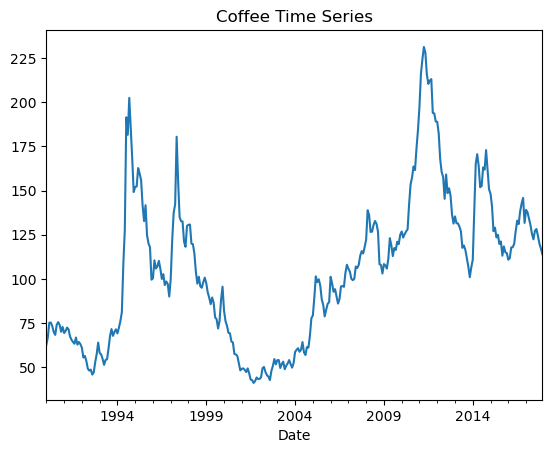

In [59]:
coffee_ts.plot()
plt.title('Coffee Time Series')

In [60]:
sm.stats.acorr_ljungbox(coffee_ts, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,2441.982433,0.0


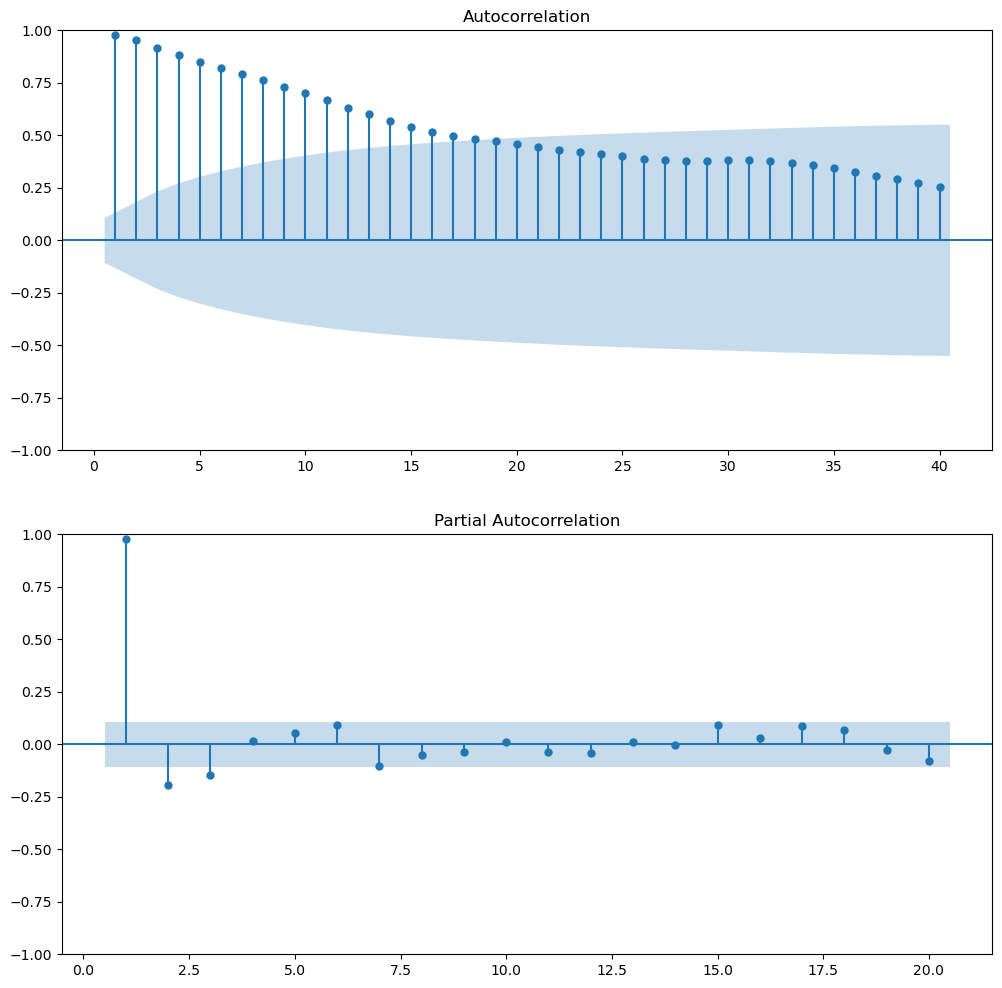

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(coffee_ts, ax=ax1, zero=False, lags=40)
plot_pacf(coffee_ts, ax=ax2, zero=False, lags=20)
plt.show()

In [62]:
#We need to take a first difference
adfuller(coffee_ts, regression='c')

(-2.3656190658161536,
 0.1516761740924007,
 6,
 329,
 {'1%': -3.4503836022181056,
  '5%': -2.8703653471616826,
  '10%': -2.571471939191249},
 2229.58476924153)

In [63]:
coffee_df2 = coffee_df.drop(index=0)
coffee_df2['CPI_diff'] = np.diff(coffee_df['CPI'], n=1)
coffee_df2 = coffee_df2.drop(columns=['CPI'])
coffee_df2.head()

,Month,Year,CPI_diff
1,1900-02-01,1990,4.26
2,1900-03-01,1990,8.24
3,1900-04-01,1990,0.09
4,1900-05-01,1990,-2.04
5,1900-06-01,1990,-3.39


In [64]:
coffee_per_month = coffee_df2.groupby(['Year', 'Month'])['CPI_diff'].sum().reset_index()
coffee_per_month.head()

,Year,Month,CPI_diff
0,1990,1900-02-01,4.26
1,1990,1900-03-01,8.24
2,1990,1900-04-01,0.09
3,1990,1900-05-01,-2.04
4,1990,1900-06-01,-3.39


In [66]:
coffee_per_month['Date'] = pd.to_datetime(coffee_per_month['Year'].astype(str) + '-' + coffee_per_month['Month'].dt.month.astype(str), 
                                        format='%Y-%m')
coffee_per_month.head()

,Year,Month,CPI_diff,Date
0,1990,1900-02-01,4.26,1990-02-01
1,1990,1900-03-01,8.24,1990-03-01
2,1990,1900-04-01,0.09,1990-04-01
3,1990,1900-05-01,-2.04,1990-05-01
4,1990,1900-06-01,-3.39,1990-06-01


In [67]:
coffee_ts_2 = pd.Series(coffee_per_month['CPI_diff'].values, index=coffee_per_month['Date'])
coffee_ts_2

Date
1990-02-01    4.26
1990-03-01    8.24
1990-04-01    0.09
1990-05-01   -2.04
1990-06-01   -3.39
              ... 
2017-08-01    0.98
2017-09-01   -3.78
2017-10-01   -4.45
2017-11-01   -2.75
2017-12-01   -3.26
Length: 335, dtype: float64

Text(0.5, 1.0, 'Coffee Time Series First Difference')

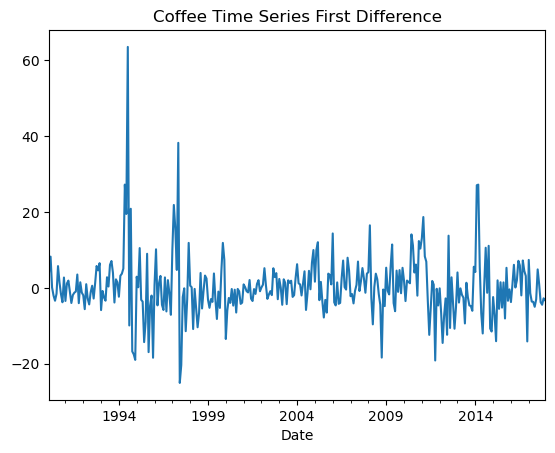

In [68]:
coffee_ts_2.plot()
plt.title('Coffee Time Series First Difference')

In [69]:
adfuller(coffee_ts_2, regression='c')

(-7.102439353931692,
 4.134667671615688e-10,
 5,
 329,
 {'1%': -3.4503836022181056,
  '5%': -2.8703653471616826,
  '10%': -2.571471939191249},
 2227.3269509249167)

In [85]:
fit_ar = ARIMA(coffee_ts_2, order=(1,1,1)).fit()

print(fit_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  335
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1171.565
Date:                Tue, 08 Oct 2024   AIC                           2349.129
Time:                        14:01:53   BIC                           2360.562
Sample:                    02-01-1990   HQIC                          2353.688
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2038      0.027      7.658      0.000       0.152       0.256
ma.L1         -0.9995      0.242     -4.133      0.000      -1.473      -0.526
sigma2        64.1856     15.295      4.197      0.0

c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


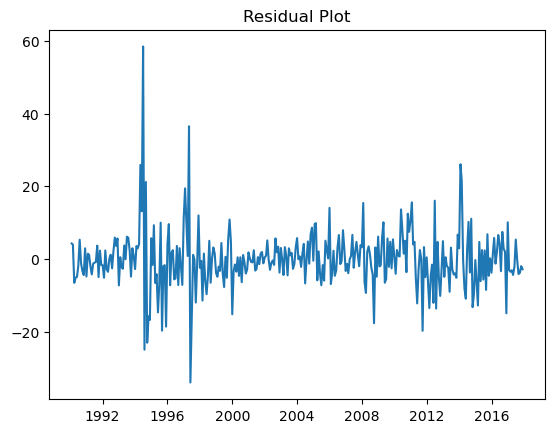

In [86]:
residuals = fit_ar.resid
plt.plot(residuals)
plt.title('Residual Plot')
plt.show()

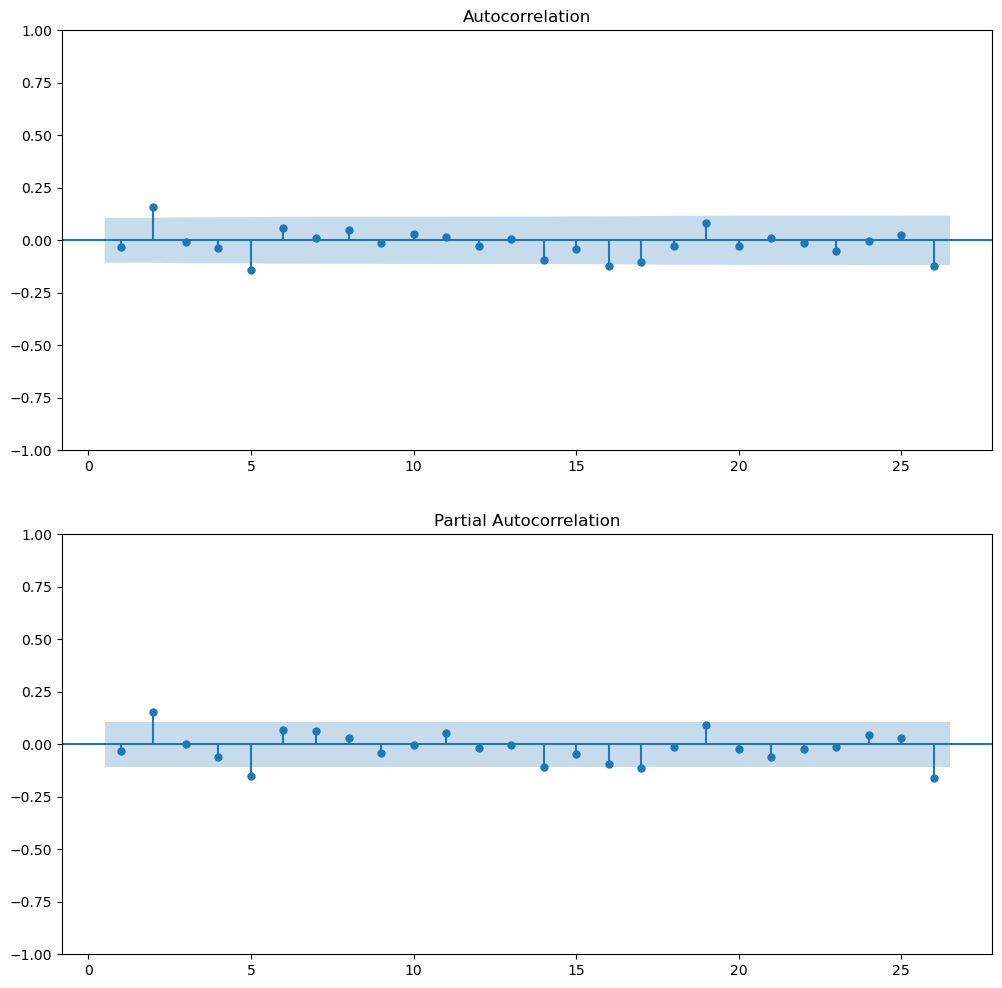

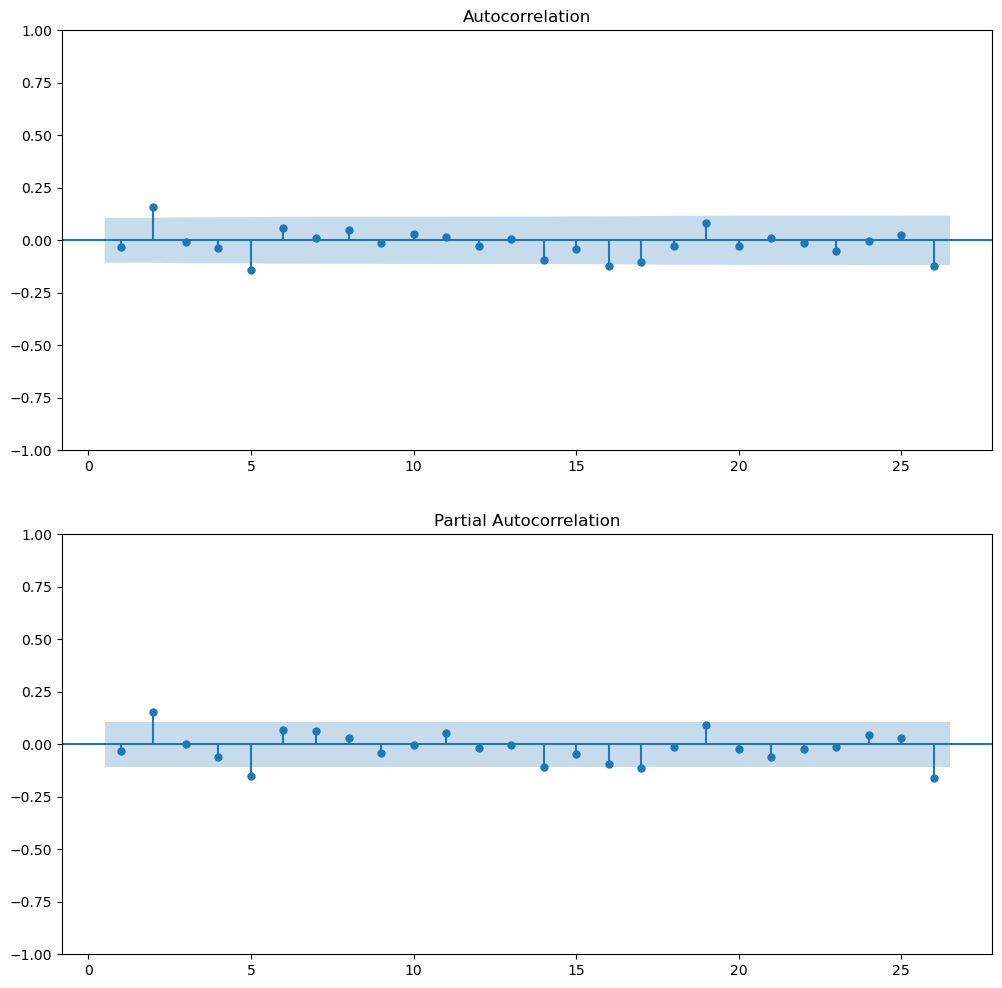

In [87]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False)

In [88]:
print(sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True))
print(adfuller(residuals, regression='c'))

      lb_stat  lb_pvalue
10  18.683282   0.044475
(-9.264416553586166, 1.3792580244450551e-15, 4, 330, {'1%': -3.4503224123605194, '5%': -2.870338478726661, '10%': -2.571457612488522}, 2230.533271141452)


In [93]:
pred = fit_ar.get_prediction()

In [94]:
predicted_mean = pred.predicted_mean
conf_int = pred.conf_int()

pred_df = pd.DataFrame({
    'predicted_mean': predicted_mean,
    'lower_bound': conf_int.iloc[:,0],
    'upper_bound': conf_int.iloc[:,1]
})

pred_df.head()

,predicted_mean,lower_bound,upper_bound
1990-02-01,0.000000,-1960.068434,1960.068434
1990-03-01,4.259819,-15.974727,24.494366
1990-04-01,6.655315,-11.906558,25.217187
1990-05-01,3.125266,-14.668174,20.918706
1990-06-01,1.546451,-15.804445,18.897347


In [97]:
prediction_df = pd.concat([pred_df,coffee_ts_2.to_frame(name='CPI')], axis=1)
prediction_df.head()

,predicted_mean,lower_bound,upper_bound,CPI
1990-02-01,0.000000,-1960.068434,1960.068434,4.26
1990-03-01,4.259819,-15.974727,24.494366,8.24
1990-04-01,6.655315,-11.906558,25.217187,0.09
1990-05-01,3.125266,-14.668174,20.918706,-2.04
1990-06-01,1.546451,-15.804445,18.897347,-3.39


In [98]:
#Error
errors = prediction_df['CPI'] - prediction_df['predicted_mean']

#Absolute value of error
errors_abs = errors.abs()

#mape
mape = (errors_abs/prediction_df['CPI'].abs()).mean() * 100

#rmse
rmse = (errors**2).mean()**0.5

print(f'Mape {mape}%')
print(f'rmse {rmse}')

Mape 154.74212712562837%
rmse 8.052609218913343


In [99]:
# Generate forecast for the next six months
forecast = fit_ar.get_forecast(steps=6)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a DataFrame with forecasted values and confidence intervals
forecast_df = pd.DataFrame({
    'Forecasted_CPI': mean_forecast,
    'Lower_Bound': confidence_intervals.iloc[:, 0],
    'Upper_Bound': confidence_intervals.iloc[:, 1]
})

forecast_df

,Forecasted_CPI,Lower_Bound,Upper_Bound
2018-01-01,-0.542790,-16.264638,15.179058
2018-02-01,0.010843,-16.043455,16.065141
2018-03-01,0.123646,-15.946226,16.193518
2018-04-01,0.146630,-15.924283,16.217542
2018-05-01,0.151313,-15.919726,16.222351
2018-06-01,0.152267,-15.918797,16.223330


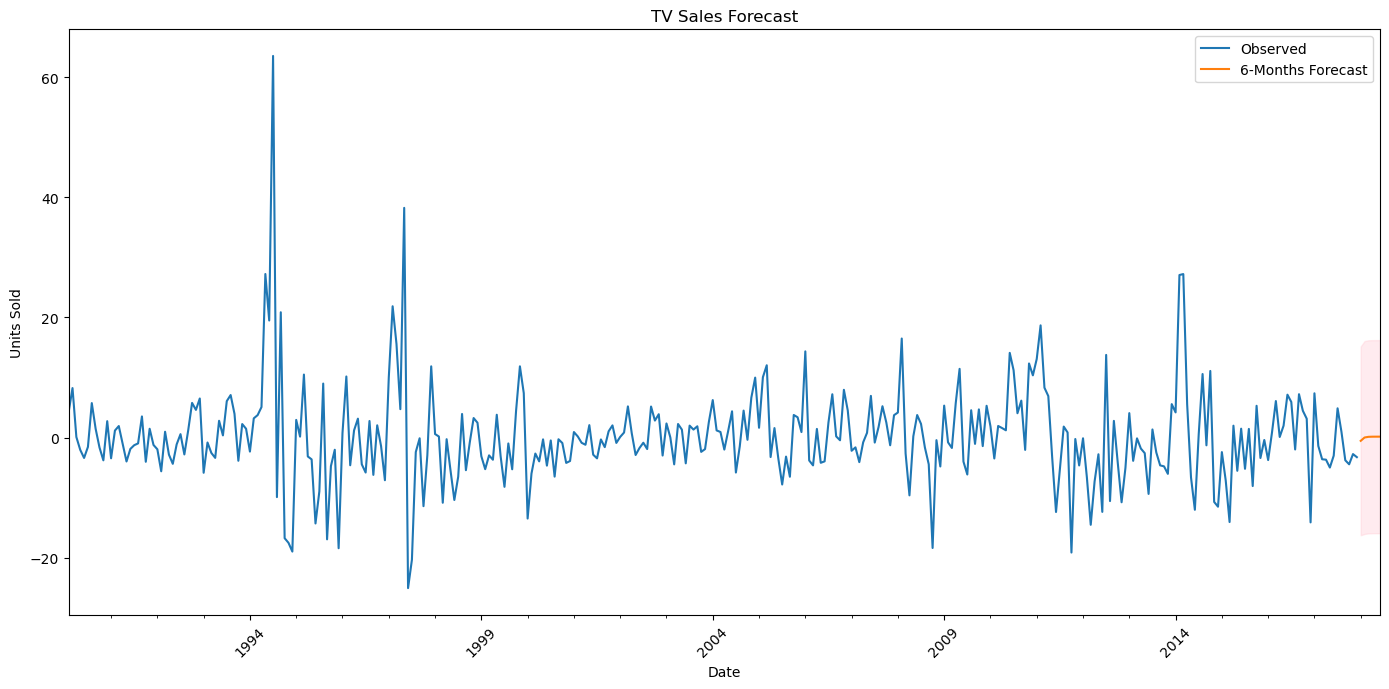

In [101]:
# Plot forecast
plt.figure(figsize=(14, 7))
coffee_ts_2.plot(label='Observed', legend=True)
mean_forecast.plot(label='6-Months Forecast', legend=True)
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title("TV Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()